#### Import Library

In [1]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Preparation:

In [2]:
# Unzip the dataset using appropriate functions and rename it to "Netflix_shows_movies."

In [3]:
# Step 1: Unzip the dataset
zip_file_path = "C:/dataset/netflix_data.zip"
extracted_folder_path = "C:\dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [4]:
# Step 2: Rename the extracted file to "Netflix_shows_movies.csv"
extracted_file_path = os.path.join(extracted_folder_path, 'netflix_data.csv')
new_file_path = os.path.join(extracted_folder_path, 'Netflix_shows_movies.csv')
os.rename(extracted_file_path, new_file_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\dataset\\netflix_data.csv' -> 'C:\\dataset\\Netflix_shows_movies.csv'

In [ ]:
# Step 3: Load the data into a Pandas DataFrame
df = pd.read_csv(new_file_path)

# Step 4: Perform data cleaning and transformation
# Check for missing values
print(df.isnull().sum())

#### Data Cleaning

In [4]:
# Handle any missing values if necessary
# For example, filling missing values with a placeholder
df.fillna('Unknown', inplace=True)

In [9]:
# Convert data types if necessary
# For example, converting the date_added column to datetime
# Function to clean date format
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%b-%y')
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%B %d, %Y')
        except ValueError:
            return pd.NaT  # Return Not-a-Time for invalid formats

# Apply the function to the date_added column
df['date_added'] = df['date_added'].apply(parse_date)

In [10]:
# Clean text fields by removing any special characters or encoding issues
df['title'] = df['title'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
df['director'] = df['director'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
df['cast'] = df['cast'].str.replace(r'[^A-Za-z0-9, ]+', '', regex=True)
df['country'] = df['country'].str.replace(r'[^A-Za-z0-9, ]+', '', regex=True)

# Display the cleaned DataFrame
print(df.head())

    show_id     type                                   title  \
0  81145628    Movie  Norm of the North King Sized Adventure   
1  80117401    Movie               Jandino Whatever it Takes   
2  70234439  TV Show                      Transformers Prime   
3  80058654  TV Show         Transformers Robots in Disguise   
4  80125979    Movie                             realityhigh   

                  director                                               cast  \
0  Richard Finn Tim Maltby  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                  Unknown                                   Jandino Asporaat   
2                  Unknown  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3                  Unknown  Will Friedle, Darren Criss, Constance Zimmer, ...   
4         Fernando Lebrija  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09  

#### Data Exploration

In [11]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
             show_id   type title director     cast        country  \
count   6.234000e+03   6234  6234     6234     6234           6234   
unique           NaN      2  6166     3302     5470            555   
top              NaN  Movie        Unknown  Unknown  United States   
freq             NaN   4265     5     1969      570           2032   
first            NaN    NaN   NaN      NaN      NaN            NaN   
last             NaN    NaN   NaN      NaN      NaN            NaN   
mean    7.670368e+07    NaN   NaN      NaN      NaN            NaN   
std     1.094296e+07    NaN   NaN      NaN      NaN            NaN   
min     2.477470e+05    NaN   NaN      NaN      NaN            NaN   
25%     8.003580e+07    NaN   NaN      NaN      NaN            NaN   
50%     8.016337e+07    NaN   NaN      NaN      NaN            NaN   
75%     8.024489e+07    NaN   NaN      NaN      NaN            NaN   
max     8.123573e+07    NaN   NaN      NaN      NaN            Na

C:\Users\DELL\AppData\Local\Temp/ipykernel_3068/659614782.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


In [12]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      651
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64


#### Visualization

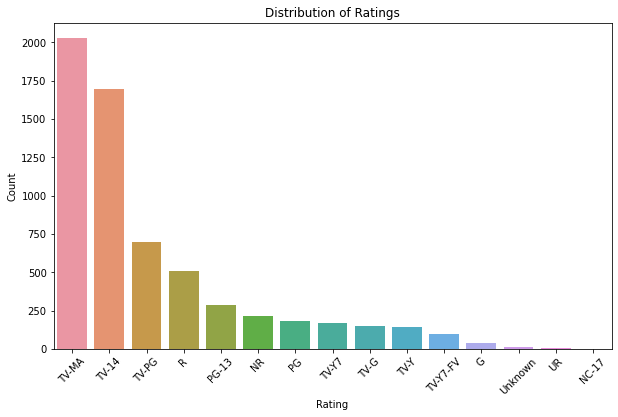

In [15]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

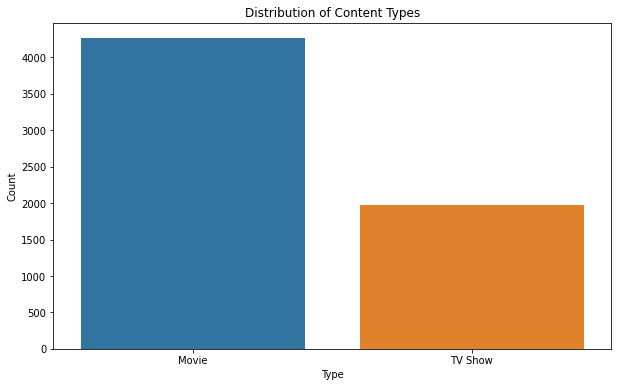

In [16]:
# Distribution of Content Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

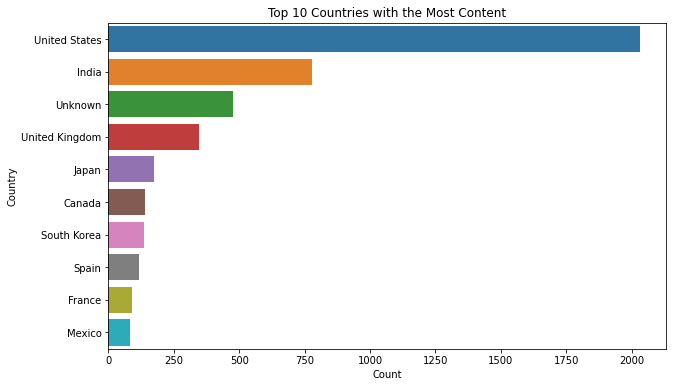

In [17]:
# Top 10 Countries with the Most Content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

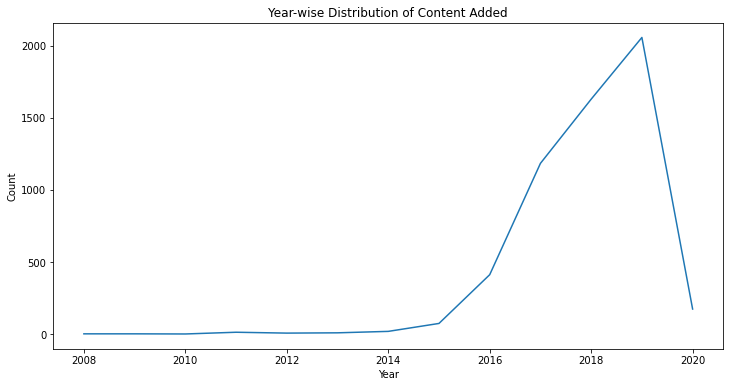

In [18]:
# Year-wise Distribution of Content Added
df['year_added'] = df['date_added'].dt.year
yearly_content = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_content.index, y=yearly_content.values)
plt.title('Year-wise Distribution of Content Added')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


C:\Users\DELL\AppData\Local\Temp/ipykernel_3068/4035771933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)


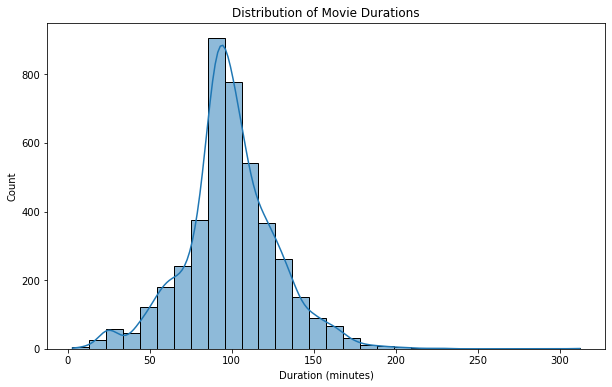

In [19]:
# Duration Analysis for Movies
df_movies = df[df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df_movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [20]:
library(ggplot2)
library(dplyr)

NameError: name 'library' is not defined

In [ ]:
df <- read.csv("Netflix_shows_movies_cleaned.csv")

# Convert the date_added column to Date type
df$date_added <- as.Date(df$date_added, format="%B %d, %Y")


In [ ]:
# Count the number of occurrences for each rating
rating_count <- df %>% 
  group_by(rating) %>% 
  summarise(count = n()) %>% 
  arrange(desc(count))

# Create the plot
ggplot(data=rating_count, aes(x=reorder(rating, -count), y=count)) +
  geom_bar(stat="identity", fill="steelblue") +
  theme_minimal() +
  labs(title="Distribution of Ratings", x="Rating", y="Count") +
  theme(axis.text.x = element_text(angle=45, hjust=1))
